# Tasks

Using the data in this dataset, you will need to train a linear regression model use a combination of house age, distance to the nearest MRT station, and number of convenience stores to estimate house price of unit area.

Below is a list of concrete tasks that you need to accomplish in your assignment

Check for missing values.  If there are any missing values, deal with them appropriately.

Provide written justification explaining why you selected particular methods for dealing with missing values

Check for outliers (Hint: box plot).  Do we keep them or do we drop them?  Why? 

Provide written justification explaining why you decided to keep or drop outliers.

Center and scale data as needed

Generate a density plot for every field that contains continuous data 

Review distributions

Chose centering and scaling approach

Provide written justification explaining why you needed (or did not need) to center and/or scale the data.

Transform data as needed

Choose transformation approach

Provide written justification explaining why you needed (or did not need) to transform the data

If there are columns that contain discrete variables, convert them to dummy variables

Create and train a linear regression model that estimates the house price of unit area

Evaluate your model using the R2 score, adjusted R2 score, and RSME score.  

Provide written explanations of what those scores mean in the context of your problem 

Play with predictors - will adding or removing predictors improve your model’s accuracy?  Build three models with three different sets of parameters to compare the results. 

Write a paragraph explaining whether or not your BEST model is “good” and why


Import necessary introduction files

In [1]:
import pandas as pd
import numpy as np

create and verify file

In [2]:
re = pd.read_csv("real_estate.csv")
re.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
#renaming the columns to make later code cleaner
re = re.rename(columns={"X1 transaction date":"t.date", "X2 house age": "age", "X3 distance to the nearest MRT station": "MRT.dist", "X4 number of convenience stores": "conv.store", "X5 latitude": "lat", "X6 longitude":"long", "Y house price of unit area":"POUA"}, errors="raise")
re.head()

,No,t.date,age,MRT.dist,conv.store,lat,long,POUA
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## Check for missing values.  If there are any missing values, deal with them appropriately.

Provide written justification explaining why you selected particular methods for dealing with missing values


In [4]:
re.isnull().sum()

No            0
t.date        0
age           0
MRT.dist      0
conv.store    0
lat           0
long          0
POUA          0
dtype: int64

The summary above shows that there are no cells with missing values, therefore there is nothing I should do in order to deal with them.

## Check for Outliers

<AxesSubplot:>

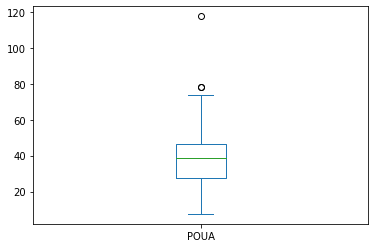

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
re['POUA'].plot.box()

there appears to only be outliers on the high end of the graph, lets look at the exact data, to see if there is an obvious incorrect input

In [6]:
re.sort_values('POUA').tail(20)

,No,t.date,age,MRT.dist,conv.store,lat,long,POUA
119,120,2013.500,16.6,289.32480,5,24.98203,121.54348,59.6
355,356,2013.250,3.8,383.86240,5,24.98085,121.54391,60.7
128,129,2013.083,41.3,124.99120,6,24.96674,121.54039,60.7
47,48,2013.583,35.9,640.73910,3,24.97563,121.53715,61.5
236,237,2013.167,3.6,373.83890,10,24.98322,121.53765,61.9
326,327,2013.500,4.1,56.47425,7,24.95744,121.53711,62.1
99,100,2013.417,6.4,90.45606,9,24.97433,121.54310,62.2
126,127,2013.083,38.6,804.68970,4,24.97838,121.53477,62.9
61,62,2013.500,5.3,259.66070,6,24.97585,121.54516,63.2
258,259,2013.417,0.0,292.99780,6,24.97744,121.54458,63.3


it is important to identify if this data is the result of a skew or if it is potentially a point that could affect a graph

<AxesSubplot:ylabel='Density'>

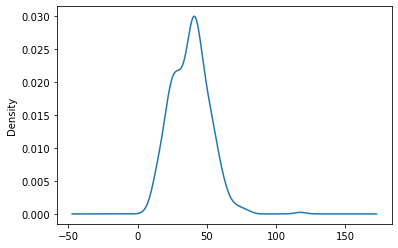

In [7]:
re['POUA'].plot.density()

while the major outlier is possible, it is important to be aware of its affect of the graph, that if there is a value that changes the model, it may be worthwhile to remove it to have a better representation of the correlation of the data.

<AxesSubplot:>

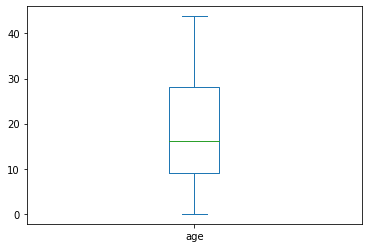

In [8]:
re['age'].plot.box()

no outliers. continue

<AxesSubplot:>

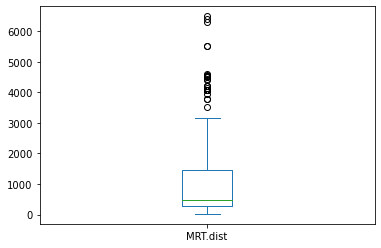

In [9]:
re['MRT.dist'].plot.box()

many outliers, potentially indicate a skewed graph or bimodal distribution, let's plot a graph to analyse the view of this data

<AxesSubplot:ylabel='Density'>

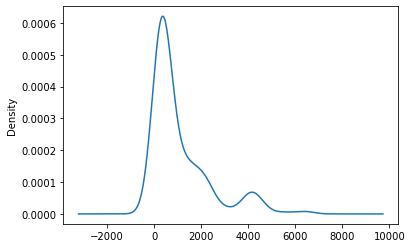

In [10]:
re['MRT.dist'].plot.density()

evident right skew, outliers are therefore understood as valid

<AxesSubplot:>

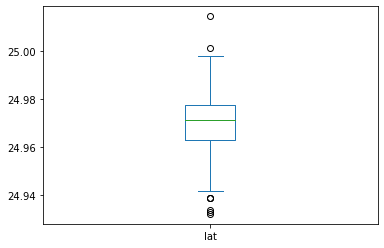

In [11]:
re['lat'].plot.box()

Given this is latitude, the relative small range of the data explain that outliers are due to latitude being locationally based and no distribution is going to explain the population. There is no intensely distant outlier that would make the data not representative.

<AxesSubplot:>

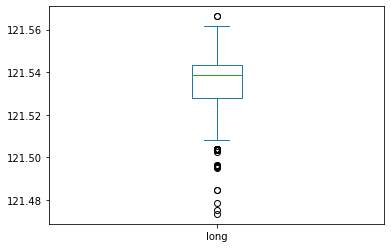

In [12]:
re['long'].plot.box()

Longitude, along with latitude, is locational and therefore not illegitimate nor unrepresentative when the data is still within a reasonable range.

<AxesSubplot:>

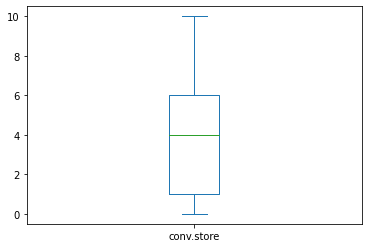

In [13]:
re['conv.store'].plot.box()

no outliers. continue

## Center and scale data as needed + Transform

<AxesSubplot:ylabel='Density'>

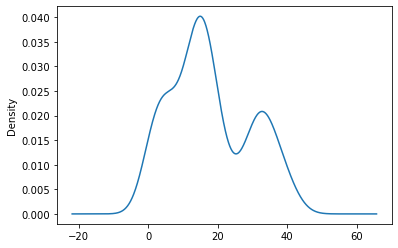

In [14]:
re['age'].plot.density()

This data is appropriate and does not have any significantly large values, it will therefore be kept the same
It also is appropriately close to zero, so it will not be scaled

<AxesSubplot:ylabel='Frequency'>

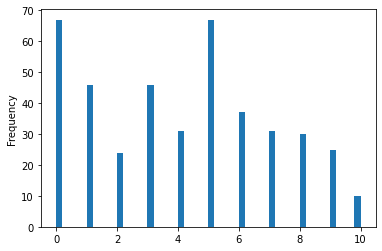

In [15]:
re['conv.store'].plot.hist(bins = 50)

This variable lacks any significantly large values that might affect the data, it remains untouched.  Since it also represents distance, it could be scaled, but it is close to zero and therefore scaling will not affect it much

<AxesSubplot:ylabel='Density'>

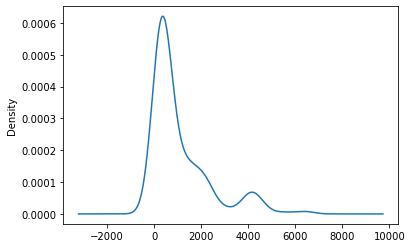

In [16]:
re['MRT.dist'].plot.density()

the data measures over distance and therefore can be scaled for clarity

<AxesSubplot:ylabel='Density'>

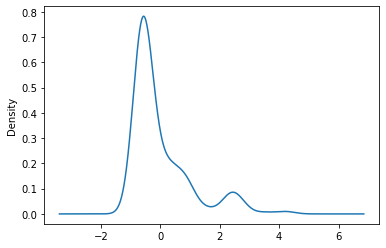

In [17]:
from sklearn import preprocessing as prep
re['MRT.scaled'] = prep.scale(re['MRT.dist'])
re['MRT.scaled'].plot.density()

the data is skewed and therefore can be assisted by realignment, lets apply a sqrt transformation

<AxesSubplot:ylabel='Density'>

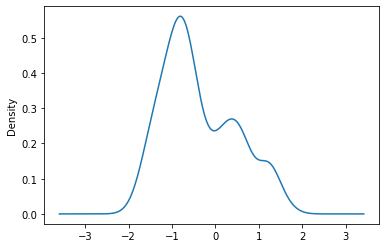

In [18]:
re['MRT.log'] = (re["MRT.scaled"] + 1).apply(np.log)
re['MRT.log'].plot.density()

this data is much more centered and less likely to cause a disproportionate outcome

<AxesSubplot:ylabel='Density'>

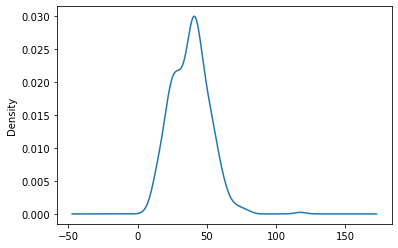

In [19]:
re['POUA'].plot.density()

this data is relatively normal, and the y-axis for which we shall be evaluating, it remains the same

Both longitude and latidude are measures of location and can therefore be scaled, but will not be transformed because it is not reasonable for the distribution to be normal

<AxesSubplot:ylabel='Frequency'>

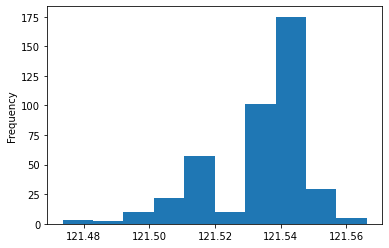

In [20]:
re['long'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

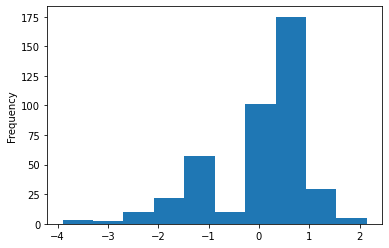

In [21]:
re['long.scaled'] = prep.scale(re['long'])
re['long.scaled'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

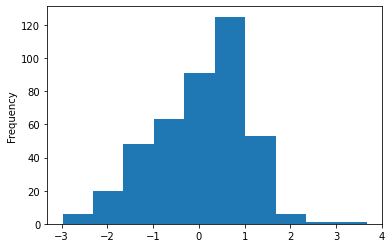

In [22]:
re['lat.scaled'] = prep.scale(re['lat'])
re['lat.scaled'].plot.hist()

## Discrete Variables

<AxesSubplot:ylabel='Density'>

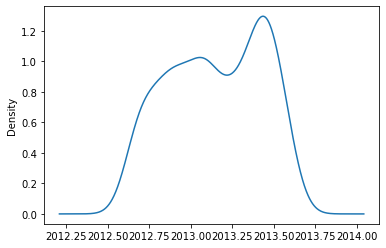

In [23]:
re['t.date'].plot.density()

In [24]:
#re['t.date'].head(50)

It actually looks like the date data types are appropriately converted to float numbers, so the only thing to do is scale them

<AxesSubplot:ylabel='Density'>

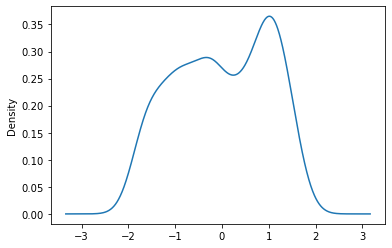

In [25]:
re['t.d.scale'] = prep.scale(re['t.date'])
re['t.d.scale'].plot.density()

this scaled plot also appears fairly normal and will not therefore be transformed.  

## Create and Train Linear Regression Model

In [26]:
X = re[['t.d.scale', 'age', 'MRT.log', 'conv.store', 'lat.scaled', 'long.scaled']]
y = re[['POUA']]

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Split for Train Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

## Make a Model

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate the Model

In [29]:
# Format
r = model.score(X_test, y_test)
yPredict = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(yPredict, y_test))
adjR = 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
print("R-sqare: ", r)
print("RMSE: ", rmse)
print("Adjusted R-square: ", adjR)

R-sqare:  0.73185056742336
RMSE:  6.379760498589893
Adjusted R-square:  0.6463387611637756


The R-Square value indicates that the Price of Unit Area is explained by our variables with a 73% accuracy.

The RMSE Score tells us that the data points tested against the model had a large standard deviation, or that they were largely spread out. 

The Adjusted R-Squared value, being lower than the R-Squared value, lets us know that some variables were not significant predictiors of the Price of Unit Area.

## Play with Predictors

In [30]:
X = re[['age','t.d.scale']]
y = re[['POUA']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)

r = model.score(X_test, y_test)
yPredict = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(yPredict, y_test))
adjR = 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
print("R-sqare: ", r)
print("RMSE: ", rmse)
print("Adjusted R-square: ", adjR)

R-sqare:  -0.0049556563765829065
RMSE:  12.350637742652658
Adjusted R-square:  0.04532358091900046


In [31]:
X = re[['MRT.log', 'conv.store','t.d.scale']]
y = re[['POUA']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)

r = model.score(X_test, y_test)
yPredict = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(yPredict, y_test))
adjR = 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
print("R-sqare: ", r)
print("RMSE: ", rmse)
print("Adjusted R-square: ", adjR)

R-sqare:  0.6514233229984445
RMSE:  7.2738626612413375
Adjusted R-square:  0.5791161821895046


In [32]:
X = re[['t.d.scale', 'lat.scaled', 'long.scaled']]
y = re[['POUA']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)

r = model.score(X_test, y_test)
yPredict = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(yPredict, y_test))
adjR = 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
print("R-sqare: ", r)
print("RMSE: ", rmse)
print("Adjusted R-square: ", adjR)

R-sqare:  0.5454979000269311
RMSE:  8.305846127480299
Adjusted R-square:  0.40821679534538824


#### My 'Best' Model was the original model with every variable.  For every evaluative value (R2, RMSE, AdjR2) this model outpreformed the other test data.  While it is the best, its ability to predict the dependent data was still quite lacking, best represented by the RMSE value.  The data deviated over 6 standard deviations away from the model, meaning that any prediction made was quite intensely different from the actual data tested against the model.  The adjusted R2 data reflects this, while the model isn't a completely different reflection of the data, it is not a very accurate predictor of of POUA.   